In [1]:
def nameFile(stri):
    char_count = 0
    year = ""
    counter = -1

    for character in stri:
        counter += 1

        if  counter+3 == len(stri):
            break
        if stri[counter].isdigit() and stri[counter+1].isdigit() and stri[counter+2].isdigit() and stri[counter+3].isdigit():
            year = stri[counter]+stri[counter+1]+stri[counter+2]+stri[counter+3]
        if len(year) == 4:
            return "Nytårstalen "+year

    return "Nytårstalen (årstal mangler)"

print(nameFile("2477"))


Nytårstalen 2477


In [2]:
#pip install nltk (just once)
import nltk #natural language toolkit
import re #regular expressions
import string #stringfunctions

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#nltk.corpus.stopwords.words('danish')
sw_dk = nltk.corpus.stopwords.words('danish')

In [5]:
sw_dk.append('år')
sw_dk.append('må')
sw_dk.append('kan')
sw_dk.append('så')
#sw_dk

In [6]:
def open_speech(file):
    with open(file) as file_object:
        content = file_object.read()

    return content

#speech = open_speech("test_data/speech.txt")

In [7]:
def clean_speech(txt):
    txt = txt.lower() #sætter alle karaktere til lower case
    txt = re.sub('\n','', txt) #fjerner alle \n 
    txt = re.sub('\[.*?]','',txt) #fjerner [] og indholdet
    txt = re.sub('\([^)]*\)','',txt) #fjerner () og indholdet
    txt = re.sub('\d', '', txt) #fjerner tal(digits)
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt) #fjerner tegn

    return txt

#speech = clean_speech(speech)

In [8]:
import datetime
def get_years():
    now = datetime.datetime.now()
    result = []
    year = 2001
    
    while year < now.year:
        
        result.append(year)
        year += 1
    
    return result
print(get_years())

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [134]:
def create_data(years):
    data = {}
    file = ""
    
    for i, year in enumerate(years):
        file = 'test_data/Nytårstalen '+str(year)
        data[str(year)] = clean_speech(open_speech(file))
        
    return data

data_dict = create_data(get_years())
#data_dict

In [12]:
#Ændrer dict value fra string til list
def value_to_list(value):
    value_list = ''.join(value)
    
    return value_list

data_combined = {key: [value_to_list(value)] for (key, value) in data_dict.items()}
#data_combined

In [13]:
import pandas as pd
def data_dict_to_df(dict_data):
    df_data = pd.DataFrame.from_dict(data_combined).transpose()
    df_data.columns = ['speech']
    
    return df_data
df_data = data_dict_to_df(data_dict)
df_data

,speech
2001,årene går og i tilbageblikket får hvert af dem...
2002,det er nytårsaften igen så alt for hurtigt sy...
2003,igen står et nyt år for døren et skudår oven i...
2004,ingen véd hvad et år kan bringe det har vi net...
2005,det er nytårsaften år synger på sit allersids...
2006,ved et årsskifte er det almindeligt at se både...
2007,nytårsaften er et af årets mærkeligste højdepu...
2008,det er årets sidste aften efter julen med dens...
2009,nytårsaften er den aften hvor vi ser tilbage p...
2010,nytårsaften er det skik at se tilbage på året ...


In [140]:
from sklearn.feature_extraction.text import CountVectorizer

cv_dk = CountVectorizer(stop_words=sw_dk) 
data_cv = cv_dk.fit_transform(df_data.speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv_dk.get_feature_names())
data_dtm.index = df_data.index
#data_dtm["2001"]

In [25]:
def top_words_all(amount):
    top_dict = {}
    data = data_dtm.transpose()
    for year in data.columns:
        top = data[year].sort_values(ascending=False).head(amount)
        top_dict[year] = list(zip(top.index, top.values))

    return top_dict

#top_words_all(4)
top_words = top_words_all(10)


In [16]:
def top_words_by_year(search_year, amount):
    top_dict = {}
    data = data_dtm.transpose()
    for x in data.columns:
        if search_year == int(x):
            top = data[x].sort_values(ascending=False).head(amount)
            top_dict[x] = list(zip(top.index, top.values))
            break

    return top_dict

    return top_dict
#print(top_words_by_year(2005,15))

In [17]:
#conda install -c conda-forge wordcloud (run once)
from wordcloud import WordCloud
wc = WordCloud (stopwords=sw_dk, background_color="white", colormap="Dark2", 
max_font_size=150, random_state=42)

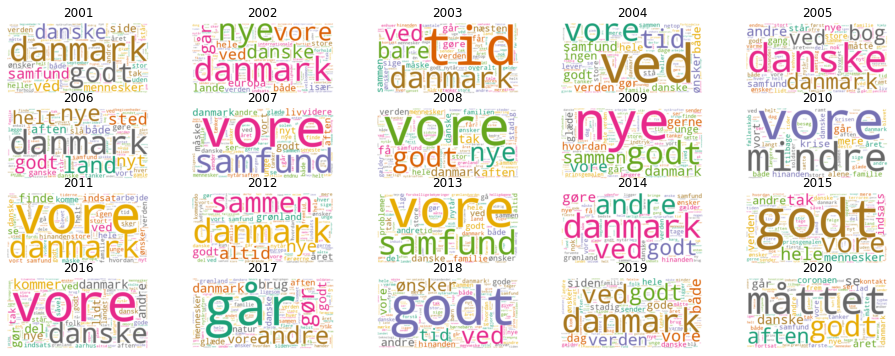

In [212]:
import matplotlib.pyplot as plt

def create_wordcloud_all():
    plt.rcParams['figure.figsize'] = [16,6]

    all_years = get_years()
    data = data_dtm.transpose()

    for i, x in enumerate(data_dict.values()):
        wc.generate(x)
  

        plt.subplot(4, 5, i+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(all_years[i])

    plt.show()

create_wordcloud_all()

2002


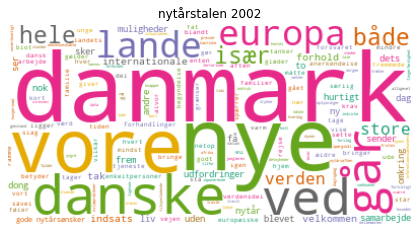

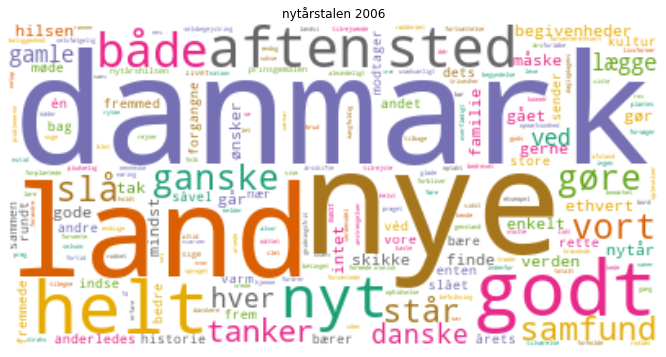

In [211]:
def create_wordcloud(year):
    plt.rcParams['figure.figsize'] = [16,6]
    
    text = data_dict[str(year)]
    #print(text)
    wc.generate(text)
    
    plt.subplot()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("nytårstalen " + str(year))
            
create_wordcloud(2006)

In [213]:
from nltk.stem import arlstem2
